### 1 : Importing Libraries

In [1]:
cd /home/Assignment/02_training_pipeline/

/home/Assignment/02_training_pipeline


In [2]:
# ignore the warnings in the output
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import libraries and packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import mlflow
from pycaret.classification import *
from scripts import utils



In [4]:
import importlib
importlib.reload(utils)

<module 'scripts.utils' from '/home/Assignment/02_training_pipeline/scripts/utils.py'>

 ### 2 Reading Data

In [5]:
##Copy the cleaned data obtained from the data_cleaning notebook into the Data folder before proceeding
%time
dataset = pd.read_csv('notebooks/Data/cleaned_data.csv')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


In [6]:
dataset.head()

,created_date,city_tier,first_platform_c,first_utm_medium_c,first_utm_source_c,total_leads_droppped,referred_lead,app_complete_flag,assistance_interaction,career_interaction,payment_interaction,social_interaction,syllabus_interaction
0,2021-07-01 00:08:15,1.0,Level0,Level11,Level2,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
1,2021-07-01 00:16:43,2.0,Level3,Level0,others,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
2,2021-07-01 00:22:20,1.0,Level3,Level0,Level0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
3,2021-07-01 00:23:13,1.0,Level1,Level3,others,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,2021-07-01 00:28:38,1.0,Level3,Level0,Level0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [7]:
# drop the data column as it is not needed for training
dataset = dataset.drop(['created_date'], axis=1)

### 3 Setting up Environment: 

In [8]:
# create a connection and setup a SQLite database with the name "lead_scoring_model_experimentation.db" in 
# 'Assignment/02_training_pipeline/notebooks/' location

import sqlite3
from sqlite3 import Error
def create_sqlit_connection(db_path,db_file):
    """ create a database connection to a SQLite database """
    conn = None
    # opening the conncetion for creating the sqlite db
    try:
        conn = sqlite3.connect(db_path+db_file)
        print(sqlite3.version)
    
    except Error as e:
        print(e)
    # closing the connection once the database is created
    finally:
        if conn:
            conn.close()
create_sqlit_connection("/home/Assignment/02_training_pipeline/notebooks/","lead_scoring_model_experimentation.db")


2.6.0


In [9]:
'''
Now you need to start the MLflow server in a new terminal. 
Note: Before you start the MLflow server, create a folder named mlruns in the assignment directory.
Now you need to run the command to start MLflow server such that:
1. The lead_scoring_model_experimentation.db which you created above is used as the backend-store.
2. mlruns folder is used as an artifact directory. 
3. The server runs on the port 6006.

The steps to do so are as follows:
Open a new terminal.
Then go to the Assignment directory using the cd command. Type the command: cd Assignment/
Create a folder named mlruns here. You can create this folder using either the command line or GUI. To create this folder via the command line run the command: mkdir ./mlruns
Then, type the following command to start the MLflow server: 
mlflow server --backend-store-uri='sqlite:///./02_training_pipeline/notebooks/lead_scoring_model_experimentation.db' --default-artifact-root="./mlruns" --port=6006 --host=0.0.0.0
'''

'\nNow you need to start the MLflow server in a new terminal. \nNote: Before you start the MLflow server, create a folder named mlruns in the assignment directory.\nNow you need to run the command to start MLflow server such that:\n1. The lead_scoring_model_experimentation.db which you created above is used as the backend-store.\n2. mlruns folder is used as an artifact directory. \n3. The server runs on the port 6006.\n\nThe steps to do so are as follows:\nOpen a new terminal.\nThen go to the Assignment directory using the cd command. Type the command: cd Assignment/\nCreate a folder named mlruns here. You can create this folder using either the command line or GUI. To create this folder via the command line run the command: mkdir ./mlruns\nThen, type the following command to start the MLflow server: \nmlflow server --backend-store-uri=\'sqlite:///./02_training_pipeline/notebooks/lead_scoring_model_experimentation.db\' --default-artifact-root="./mlruns" --port=6006 --host=0.0.0.0\n'

In [9]:
cd /home/Assignment/

/home/Assignment


In [10]:
# Once, server is successfully running, configuring mlflow tracking uri at "http://0.0.0.0:6006"
mlflow.set_tracking_uri('http://0.0.0.0:6006')

In [11]:
# setup pycaret 
Baseline_model_exp01 = setup(data = dataset, target = 'app_complete_flag', 
                   session_id = 42,fix_imbalance=False,
                   n_jobs=-1,use_gpu=True,
                   log_experiment=True,experiment_name='Baseline_model_exp01',
                   log_plots=True, log_data=True,
                   silent=True, verbose=True,
                   log_profile=False)

,Description,Value
0,session_id,42
1,Target,app_complete_flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(238964, 12)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


2024/03/12 06:37:11 INFO mlflow.tracking.fluent: Experiment with name 'Baseline_model_exp01' does not exist. Creating a new experiment.


In [12]:
# function to get the X,y data

def get_train_test_set_from_setup():
    return get_config(variable="X_train"),\
            get_config(variable="y_train"),\
            get_config(variable="X_test"),\
            get_config(variable="y_test")

In [13]:
X_train, y_train, X_test, y_test = get_train_test_set_from_setup()
X_train.head()

,city_tier,total_leads_droppped,assistance_interaction,career_interaction,payment_interaction,social_interaction,syllabus_interaction,first_platform_c_Level0,first_platform_c_Level1,first_platform_c_Level2,...,first_utm_source_c_Level0,first_utm_source_c_Level14,first_utm_source_c_Level16,first_utm_source_c_Level2,first_utm_source_c_Level4,first_utm_source_c_Level5,first_utm_source_c_Level6,first_utm_source_c_Level7,first_utm_source_c_others,referred_lead_1.0
145738,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
190371,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
203050,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77844,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
233209,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 4 : Model Experimentation with pycaret

In [14]:
# creating an experimentation with pycaret and exclude ['gbc','knn','qda', 'dummy', 'svm', 'ada']

best_model = compare_models(fold = 5, exclude = ['gbc','knn','qda', 'dummy', 'svm', 'ada']) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7386,0.8211,0.8317,0.7029,0.7619,0.4766,0.4849,0.6440
lightgbm,Light Gradient Boosting Machine,0.7385,0.8211,0.8343,0.7020,0.7624,0.4765,0.4854,4.7220
et,Extra Trees Classifier,0.7367,0.8176,0.8210,0.7044,0.7582,0.4729,0.4797,3.1400
dt,Decision Tree Classifier,0.7364,0.8166,0.8205,0.7041,0.7579,0.4723,0.4789,0.4560
rf,Random Forest Classifier,0.7346,0.8169,0.8394,0.6957,0.7608,0.4686,0.4791,1.5680
lr,Logistic Regression,0.7098,0.7837,0.8224,0.6730,0.7402,0.4188,0.4297,1.5100
ridge,Ridge Classifier,0.7005,0.0000,0.7962,0.6702,0.7278,0.4003,0.4077,0.2820
lda,Linear Discriminant Analysis,0.7005,0.7733,0.7961,0.6702,0.7277,0.4003,0.4077,1.0380
nb,Naive Bayes,0.6629,0.7335,0.8924,0.6134,0.7269,0.3241,0.3653,0.2120


In [15]:
# creating model which gives the highest accuracy

lgm = create_model("lightgbm",fold=5)

In [16]:
!pip install shap

     |████████████████████████████████| 538 kB 1.2 MB/s eta 0:00:01


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


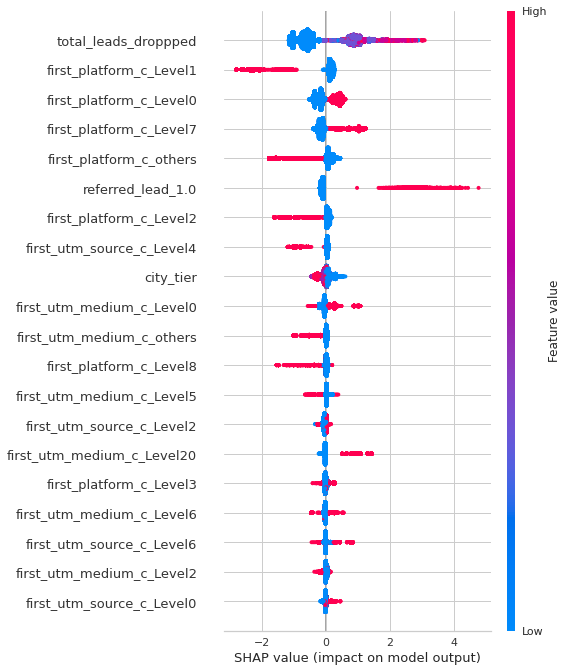

In [17]:
# creating feature importance plot

interpret_model(lgm)

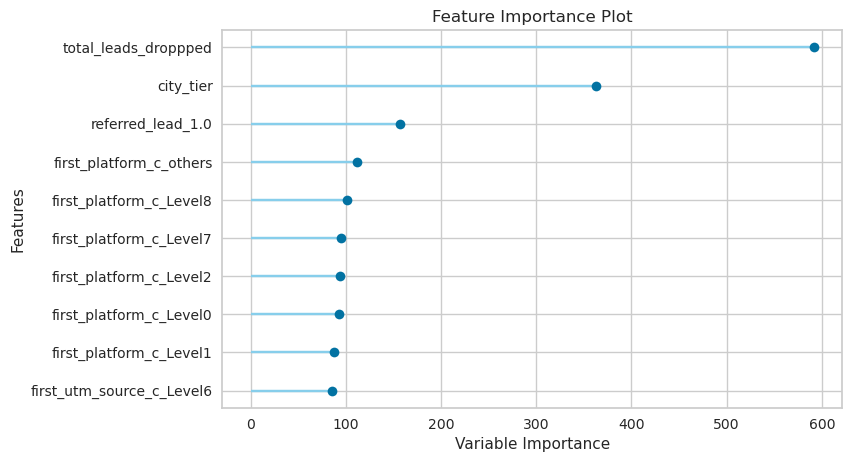

In [18]:
plot_model(lgm, plot='feature')

### 5 : Model Experimentation after dropping features

From the above feature tests we can claerly see that some of the features are not significant. We will now drop all the insignificant features and select only the significant ones.
The list of the significant features is 
['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c'].
So now you will train your model with onlly these features.

Also note that in our previous experiments we saw that tree based models are our top performers. In case of tree based models we do not require transformationss normalization, scaling etc. So make sure that you use setup pycaret in the proper way. i.e, make sure that you use normalize = False and transformation = False.

In [19]:
# ['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c']

df_with_top_features = dataset[['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c']]



data_for_model, data_unseen = utils.get_validation_unseen_set(df_with_top_features, validation_frac=0.05, sample=False, sample_frac=0.1)
print('Data for Modeling: ' + str(data_for_model.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [20]:
# Train the model using the features listed above. Since we are using tree models we do not require any transformaions 
# such as normalization, scaling etc.So make sure that you use setup pycaret in the proper way. i.e, make sure that you use 
# normalize = False and transformation = False.

Baseline_model_exp02 = setup(data = df_with_top_features, target = 'app_complete_flag', 
                   session_id = 42,fix_imbalance=False,normalize = False, transformation = False,
                   n_jobs=-1,use_gpu=True,
                   log_experiment=True,experiment_name='Baseline_model_exp02',
                   log_plots=True, log_data=True,
                   silent=True, verbose=True,
                   log_profile=False)

,Description,Value
0,session_id,42
1,Target,app_complete_flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(238964, 7)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


2024/03/12 06:47:41 INFO mlflow.tracking.fluent: Experiment with name 'Baseline_model_exp02' does not exist. Creating a new experiment.


In [21]:
X_train, y_train, X_test, y_test = get_train_test_set_from_setup()
X_train.head()

,total_leads_droppped,city_tier,referred_lead_0.0,first_platform_c_Level0,first_platform_c_Level1,first_platform_c_Level2,first_platform_c_Level3,first_platform_c_Level7,first_platform_c_Level8,first_platform_c_others,...,first_utm_medium_c_others,first_utm_source_c_Level0,first_utm_source_c_Level14,first_utm_source_c_Level16,first_utm_source_c_Level2,first_utm_source_c_Level4,first_utm_source_c_Level5,first_utm_source_c_Level6,first_utm_source_c_Level7,first_utm_source_c_others
145738,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
190371,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
203050,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77844,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
233209,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
# Again creating an experimentation with pycaret and exclude ['gbc','knn','qda', 'dummy', 'svm', 'ada']. 

best_model = compare_models(fold=5, exclude = ['gbc','knn','qda', 'dummy', 'svm', 'ada'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7385,0.8210,0.8348,0.7018,0.7625,0.4765,0.4855,4.6600
xgboost,Extreme Gradient Boosting,0.7384,0.8209,0.8303,0.7031,0.7614,0.4762,0.4843,0.5580
et,Extra Trees Classifier,0.7366,0.8174,0.8211,0.7042,0.7582,0.4727,0.4795,3.1560
dt,Decision Tree Classifier,0.7363,0.8166,0.8205,0.7041,0.7578,0.4722,0.4788,0.4080
rf,Random Forest Classifier,0.7350,0.8178,0.8432,0.6949,0.7619,0.4693,0.4805,1.3600
lr,Logistic Regression,0.7097,0.7835,0.8223,0.6729,0.7402,0.4187,0.4295,0.2520
ridge,Ridge Classifier,0.7002,0.0000,0.7959,0.6700,0.7275,0.3998,0.4072,0.1720
lda,Linear Discriminant Analysis,0.7002,0.7726,0.7959,0.6700,0.7275,0.3998,0.4072,0.8560
nb,Naive Bayes,0.6701,0.7337,0.8568,0.6255,0.7231,0.3387,0.3650,0.2000


In [23]:
# We get lightgbm as the best performing model. So now we will train a lightGBM model manually using pycaret

lgbm = create_model("lightgbm", fold=5)

In [24]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [25]:
!pip install optuna

     |████████████████████████████████| 413 kB 1.2 MB/s eta 0:00:01


In [26]:
# Tune the hyper parameters of the lightgbm model using optuna on 10 folds and optimise AUC as that was our system metric, 
# hence we will optimise AUC
# Tried with optuna but getting error related to deprecated method. So falling back to scikit-learn
tuned_lgm, tuner_0 = tune_model(lgbm,
                                optimize='AUC',
                                search_library='scikit-learn',
                                search_algorithm='random',
                                fold = 10,
                                choose_better=True,
                                return_tuner=True)

In [30]:
# Print the final models configuration so that we can use it in the model retraining pipeline 
print(tuned_lgm)
print('-' * 80)
print(tuner_0.best_params_)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, device='gpu',
               feature_fraction=0.7, importance_type='split', learning_rate=0.2,
               max_depth=-1, min_child_samples=81, min_child_weight=0.001,
               min_split_gain=0.1, n_estimators=90, n_jobs=-1, num_leaves=40,
               objective=None, random_state=42, reg_alpha=0.0005,
               reg_lambda=0.7, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
--------------------------------------------------------------------------------
{'actual_estimator__reg_lambda': 0.7, 'actual_estimator__reg_alpha': 0.0005, 'actual_estimator__num_leaves': 40, 'actual_estimator__n_estimators': 90, 'actual_estimator__min_split_gain': 0.1, 'actual_estimator__min_child_samples': 81, 'actual_estimator__learning_rate': 0.2, 'actual_estimator__feature_fraction': 0.7, 'actual_estimator__bagging_freq': 3,